#### importing all the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### reading the dataset

In [3]:
crm_df = pd.read_csv('c:/Users/Administrator/Desktop/Projects/Domain Analytics/Capstone/ecommerce_crm.csv', encoding = 'iso-8859-1')

#### first five rows of the dataset

In [4]:
crm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### bottom five rows of the dataset

In [5]:
crm_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


#### rows and columns of the dataset

In [43]:
print(crm_df.shape)
print(f'There are {crm_df.shape[0]} rows in the dataset')
print(f'There are {crm_df.shape[1]} columns in the dataset')

(541909, 10)
There are 541909 rows in the dataset
There are 10 columns in the dataset


#### total records present in this dataset

In [7]:
crm_df.size

4335272

#### basic information about the dataset

In [8]:
crm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### check unique values in each feature and the count of unique values

In [9]:
# check unique values in each feature and the count of unique values
def check_unique_values(dataframe):
    for col in dataframe.columns:
        print()
        print(f'Total unique values in {col}: {dataframe[col].nunique()}')
        print()
        print(f'Unique values in {col} : {dataframe[col].unique()}')
        print('-' * 75)

check_unique_values(crm_df)


Total unique values in InvoiceNo: 25900

Unique values in InvoiceNo : ['536365' '536366' '536367' ... '581585' '581586' '581587']
---------------------------------------------------------------------------

Total unique values in StockCode: 4070

Unique values in StockCode : ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
---------------------------------------------------------------------------

Total unique values in Description: 4223

Unique values in Description : ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
---------------------------------------------------------------------------

Total unique values in Quantity: 722

Unique values in Quantity : [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288

#### # checking null values

In [10]:
# checking null values
crm_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### checking duplicate value in dataframe

In [ ]:
# checking duplicate value in dataframe
print(f'Total duplicate values present in the dataframe: {crm_df.duplicated().sum()}')
crm_df[crm_df.duplicated()].sum()

Total duplicate values present in the dataframe: 5268


InvoiceNo      5364095364095364095364095364125364125364125364...
StockCode      2186622866229002211122327222732274922141214482...
Description    UNION JACK FLAG LUGGAGE TAGHAND WARMER SCOTTY ...
Quantity                                                   13948
InvoiceDate    12/1/2010 11:4512/1/2010 11:4512/1/2010 11:451...
UnitPrice                                                12731.0
CustomerID                                            82500558.0
Country        United KingdomUnited KingdomUnited KingdomUnit...
dtype: object

#### showing the columns where quantity is less than 0

In [12]:
crm_df[crm_df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


#### creating two boolean columns one is free item where unitprice is 0 and return transaction where quantity is less than zero

In [13]:
crm_df['free_item'] = crm_df['UnitPrice'] == 0.0
crm_df['return_transaction'] = crm_df['Quantity'] < 0

#### showing 15 sample rows from the dataset

In [14]:
crm_df.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,free_item,return_transaction
149712,549300,22854,CREAM SWEETHEART EGG HOLDER,4,4/8/2011 8:21,4.95,13362.0,United Kingdom,False,False
229436,557057,21394,RED POLKADOT BEAKER,96,6/16/2011 14:46,0.39,16843.0,United Kingdom,False,False
331918,566043,23355,HOT WATER BOTTLE KEEP CALM,4,9/8/2011 13:54,4.95,13769.0,United Kingdom,False,False
146563,548993,21774,DECORATIVE CATS BATHROOM BOTTLE,36,4/5/2011 13:56,1.25,12753.0,Japan,False,False
45878,540288,21524,DOORMAT SPOTTY HOME SWEET HOME,1,1/6/2011 12:45,7.95,17634.0,United Kingdom,False,False
348132,567378,22489,PACK OF 12 TRADITIONAL CRAYONS,24,9/20/2011 10:01,0.42,14911.0,EIRE,False,False
37834,539484,85049E,SCANDINAVIAN REDS RIBBONS,36,12/19/2010 15:44,1.25,15640.0,United Kingdom,False,False
74691,542520,20754,RETROSPOT RED WASHING UP GLOVES,1,1/28/2011 12:21,2.10,15547.0,United Kingdom,False,False
534926,581175,22865,HAND WARMER OWL DESIGN,96,12/7/2011 15:16,1.85,14646.0,Netherlands,False,False
522938,580482,23598,PAPER BUNTING VINTAGE PARTY,1,12/4/2011 12:44,2.95,16033.0,United Kingdom,False,False


#### taking only the records where there are no return transaction and no free item

In [15]:
df = crm_df[(crm_df['return_transaction'] == False) & (crm_df['free_item'] == False)]

#### after taking checking the rows and columns

In [44]:
print(crm_df.shape)
print(f'There are {df.shape[0]} rows in the dataset')
print(f'There are {df.shape[1]} columns in the dataset')

(541909, 10)
There are 524880 rows in the dataset
There are 11 columns in the dataset


#### checking basic information of the new dataframe

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530106 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           530106 non-null  object 
 1   StockCode           530106 non-null  object 
 2   Description         530106 non-null  object 
 3   Quantity            530106 non-null  int64  
 4   InvoiceDate         530106 non-null  object 
 5   UnitPrice           530106 non-null  float64
 6   CustomerID          397884 non-null  float64
 7   Country             530106 non-null  object 
 8   free_item           530106 non-null  bool   
 9   return_transaction  530106 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 37.4+ MB


#### checking the null values present in the dataframe

In [18]:
df.isna().sum()

InvoiceNo                  0
StockCode                  0
Description                0
Quantity                   0
InvoiceDate                0
UnitPrice                  0
CustomerID            132222
Country                    0
free_item                  0
return_transaction         0
dtype: int64

#### checking duplicated values in the dataframe

In [19]:
print(f'Total number of duplicate values present: {df.duplicated().sum()}')
df[df.duplicated()].sum()

Total number of duplicate values present: 5226


InvoiceNo             5364095364095364095364095364125364125364125364...
StockCode             2186622866229002211122327222732274922141214482...
Description           UNION JACK FLAG LUGGAGE TAGHAND WARMER SCOTTY ...
Quantity                                                          15956
InvoiceDate           12/1/2010 11:4512/1/2010 11:4512/1/2010 11:451...
UnitPrice                                                      12575.73
CustomerID                                                   81992398.0
Country               United KingdomUnited KingdomUnited KingdomUnit...
free_item                                                             0
return_transaction                                                    0
dtype: object

#### drop the duplicates values but keeping the first rows only 

In [20]:
df.drop_duplicates(keep='first', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10488\202288913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


#### showing sample 25 rows from the dataset

In [21]:
df.sample(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,free_item,return_transaction
468346,576463,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,2,11/15/2011 11:37,4.25,17974.0,United Kingdom,False,False
295023,562768,85099B,JUMBO BAG RED RETROSPOT,10,8/9/2011 10:49,2.08,14127.0,United Kingdom,False,False
164501,550649,22960,JAM MAKING SET WITH JARS,6,4/19/2011 16:37,4.25,13134.0,United Kingdom,False,False
504079,578942,23359,SET OF 12 T-LIGHTS VINTAGE DOILY,1,11/27/2011 13:29,1.95,17288.0,United Kingdom,False,False
304443,563578,22801,ANTIQUE GLASS PEDESTAL BOWL,4,8/17/2011 15:11,3.75,12949.0,United Kingdom,False,False
530355,580848,23058,CHRISTMAS HANGING SNOWFLAKE,4,12/6/2011 11:51,0.79,18005.0,United Kingdom,False,False
281929,561611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,16,7/28/2011 12:29,5.95,17975.0,United Kingdom,False,False
365558,568710,21181,PLEASE ONE PERSON METAL SIGN,2,9/28/2011 15:42,2.10,14649.0,United Kingdom,False,False
517297,580049,21084,SET/6 COLLAGE PAPER CUPS,24,12/1/2011 12:54,0.19,13599.0,United Kingdom,False,False
426108,573344,22150,3 STRIPEY MICE FELTCRAFT,1,10/30/2011 12:07,1.95,14179.0,United Kingdom,False,False


In [22]:
# converting datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524880 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           524880 non-null  object 
 1   StockCode           524880 non-null  object 
 2   Description         524880 non-null  object 
 3   Quantity            524880 non-null  int64  
 4   InvoiceDate         524880 non-null  object 
 5   UnitPrice           524880 non-null  float64
 6   CustomerID          392692 non-null  float64
 7   Country             524880 non-null  object 
 8   free_item           524880 non-null  bool   
 9   return_transaction  524880 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 37.0+ MB


#### converting the datatype of Invoice date column to date and time

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10488\3633860036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


#### creating a new feature total price which is quantity multiplied by unit price

In [25]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10488\523712759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


#### showing 5 sample rows from the dataset

In [26]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,free_item,return_transaction,TotalPrice
446129,574880,22197,POPCORN HOLDER,50,2011-11-07 13:25:00,0.85,18016.0,United Kingdom,False,False,42.50
446767,574919,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-11-07 16:33:00,1.25,16241.0,United Kingdom,False,False,15.00
42077,539958,22371,AIRLINE BAG VINTAGE TOKYO 78,4,2010-12-23 13:26:00,4.21,NaN,United Kingdom,False,False,16.84
20675,538069,22570,FELTCRAFT CUSHION RABBIT,1,2010-12-09 14:08:00,3.75,16795.0,United Kingdom,False,False,3.75
177470,552065,21749,LARGE RED RETROSPOT WINDMILL,1,2011-05-06 11:20:00,2.10,16729.0,United Kingdom,False,False,2.10


#### Basic descriptive statistics for numerical cols

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,524880.0,10.616564,1.0,1.0,4.0,11.0,80995.0,156.279734
InvoiceDate,524880,2011-07-04 15:30:29.147691008,2010-12-01 08:26:00,2011-03-28 12:13:00,2011-07-20 11:22:00,2011-10-19 11:41:00,2011-12-09 12:50:00,NaN
UnitPrice,524880.0,3.880407,-11062.06,1.25,2.08,4.13,13541.33,42.063124
CustomerID,392692.0,15287.843865,12346.0,13955.0,15150.0,16791.0,18287.0,1713.539549
TotalPrice,524880.0,20.233171,-11062.06,3.9,9.92,17.7,168469.6,272.552926


#### Basic Descriptive statistics for categorical columns

In [45]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,524880,19962,573585,1114
StockCode,524880,3922,85123A,2253
Description,524880,4026,WHITE HANGING HEART T-LIGHT HOLDER,2311
Country,524880,38,United Kingdom,479987


#### showing all the columns

In [28]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'free_item', 'return_transaction',
       'TotalPrice'],
      dtype='object')

#### Creating Recency, Frequency and Monetary Analysis

#### Creating RFM Analysis

#### maximum of the invoice date is supposed to be today date

In [29]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [30]:
today_date = pd.to_datetime('2011-12-09')

#### group customer_id and finding for each customer there recency, frequency and monetary

In [31]:
# Calculation of Recency, Frequency and Monetary values

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'InvoiceNo': lambda num: num.nunique(),
                                     'TotalPrice': 'sum',
                                     'Description': 'sum'})
rfm

,InvoiceDate,InvoiceNo,TotalPrice,Description
CustomerID,,,,
12346.0,324,1,77183.60,MEDIUM CERAMIC TOP STORAGE JAR
12347.0,1,7,4310.00,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...
12348.0,74,4,1797.24,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...
12349.0,17,1,1757.55,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...
12350.0,309,1,334.40,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...
...,...,...,...,...
18280.0,276,1,180.60,WOOD BLACK BOARD ANT WHITE FINISHRETROSPOT LAM...
18281.0,179,1,80.82,ROBOT BIRTHDAY CARDCARD CIRCUS PARADEPENNY FAR...
18282.0,6,2,178.05,ANTIQUE CREAM CUTLERY CUPBOARDFRENCH STYLE STO...


#### renaming the column name

In [32]:
# Lets change the rfm columns to understandable.

rfm.columns = ["recency", "frequency", "monetary", "description"]
rfm.head()

,recency,frequency,monetary,description
CustomerID,,,,
12346.0,324,1,77183.60,MEDIUM CERAMIC TOP STORAGE JAR
12347.0,1,7,4310.00,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...
12348.0,74,4,1797.24,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...
12349.0,17,1,1757.55,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...
12350.0,309,1,334.40,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...


In [33]:
# In this part we should ignoring the monetary values that equal to 0.

rfm = rfm[rfm["monetary"] >0]

#### label them and segment based on the label

In [34]:
rfm["recency_score"]   = pd.qcut(rfm["recency"], 5, labels = [5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["monetary_score"]  = pd.qcut(rfm["monetary"], 5, labels = [1,2,3,4,5])
rfm["RFM_SCORE"]       = (rfm['recency_score'].astype(str) + rfm["frequency_score"].astype(str))

rfm.head()

,recency,frequency,monetary,description,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,,
12346.0,324,1,77183.60,MEDIUM CERAMIC TOP STORAGE JAR,1,1,5,11
12347.0,1,7,4310.00,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,5,5,5,55
12348.0,74,4,1797.24,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2,4,4,24
12349.0,17,1,1757.55,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,4,1,4,41
12350.0,309,1,334.40,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,1,1,2,11


#### segmenting customers based on the labels they have

In [35]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

,recency,frequency,monetary,description,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,,
12346.0,324,1,77183.60,MEDIUM CERAMIC TOP STORAGE JAR,1,1,5,11,hibernating
12347.0,1,7,4310.00,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,5,5,5,55,champions
12348.0,74,4,1797.24,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2,4,4,24,at_Risk
12349.0,17,1,1757.55,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,4,1,4,41,promising
12350.0,309,1,334.40,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,1,1,2,11,hibernating


#### checking how many unique values are present in each segment

In [36]:
# How many customers from each segment
rfm["segment"].value_counts()

segment
hibernating            1071
loyal_customers         819
champions               633
at_Risk                 593
potential_loyalists     484
about_to_sleep          352
need_attention          187
promising                94
cant_loose               63
new_customers            42
Name: count, dtype: int64

#### plotting that segment

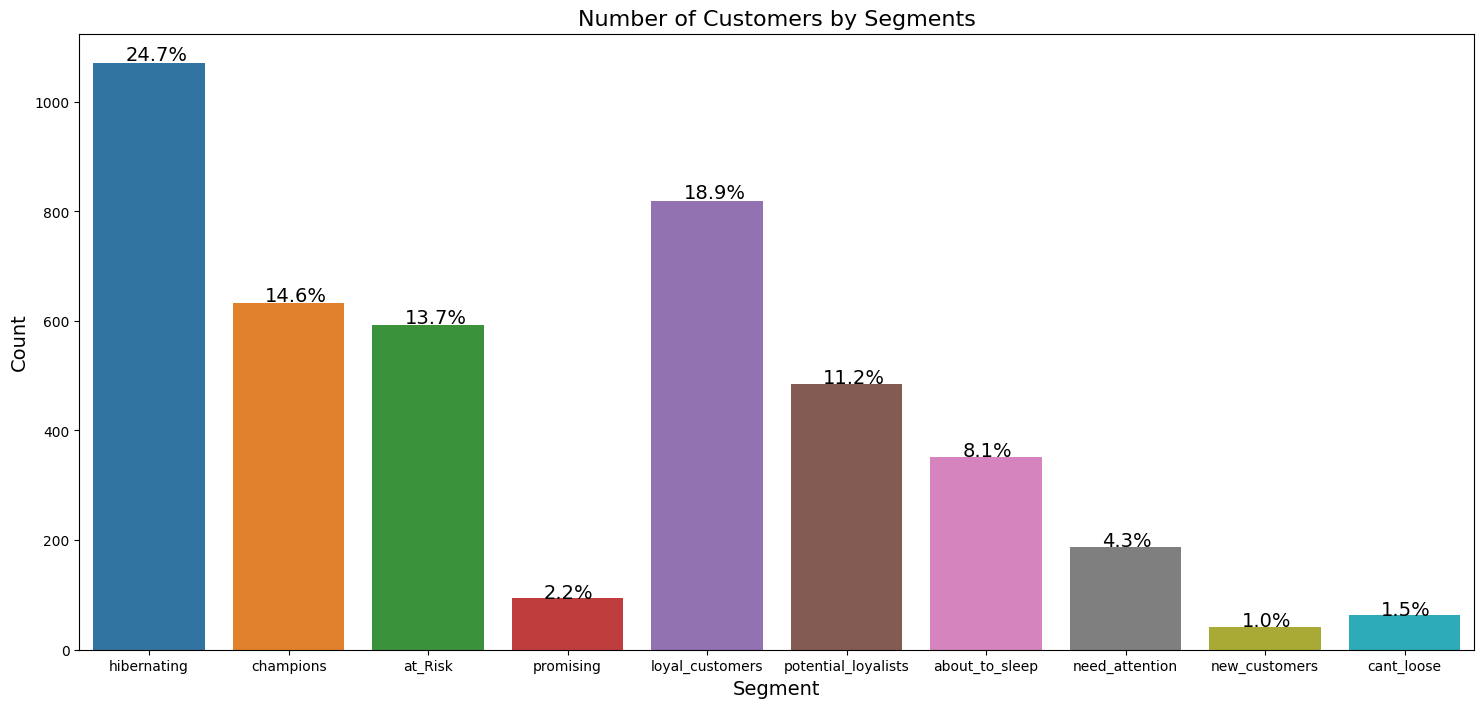

In [37]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment', hue='segment', legend=False)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

#### the most number of customer we have is in the segment of hibernating and loyal customers followed by champions and at risk

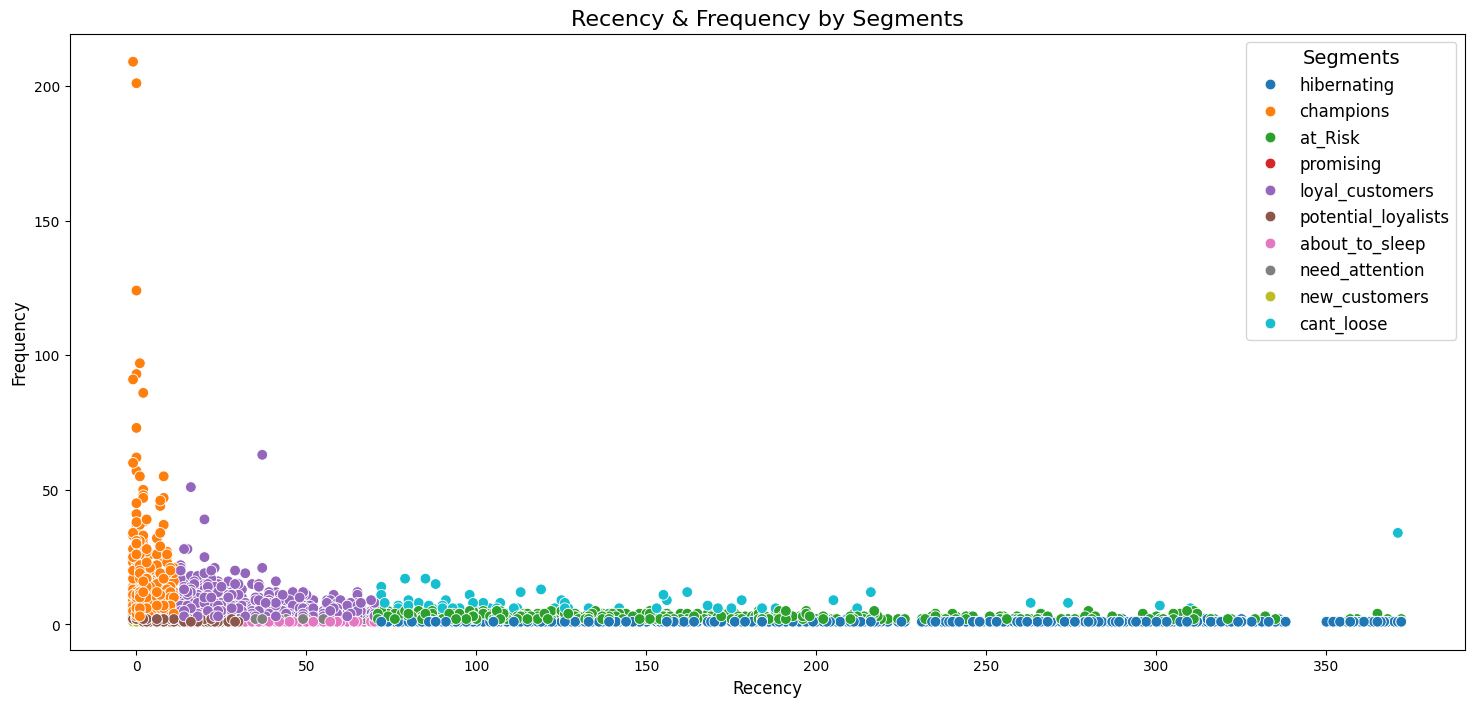

In [38]:
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="recency", y="frequency", hue="segment", s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10488\2590424812.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10488\2590424812.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10488\2590424812.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)


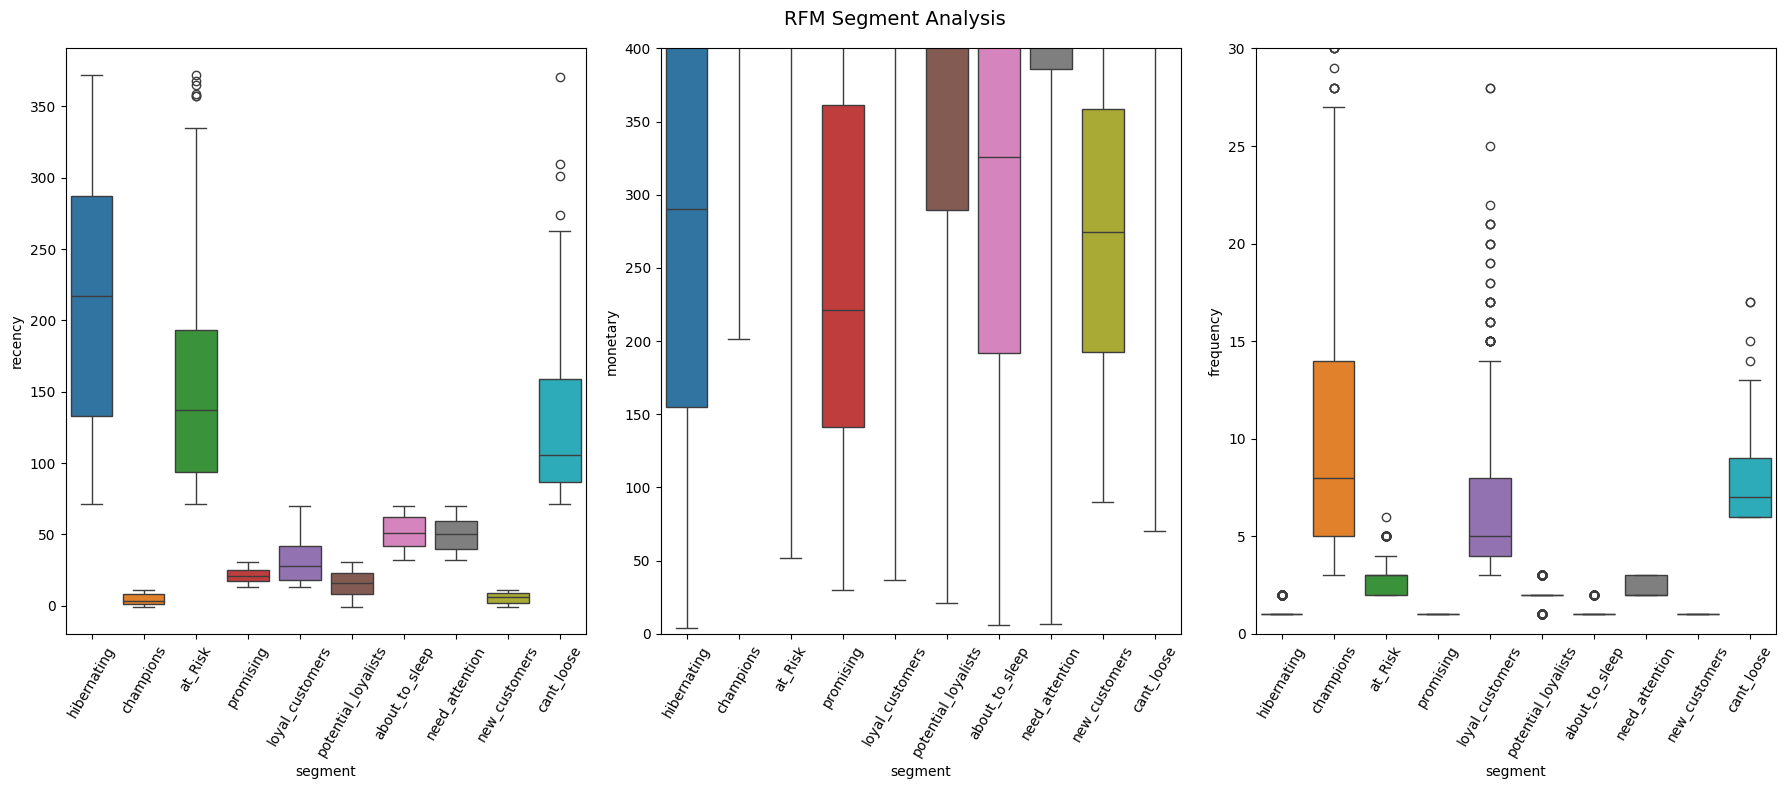

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["recency", "monetary", "frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], hue='segment'
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

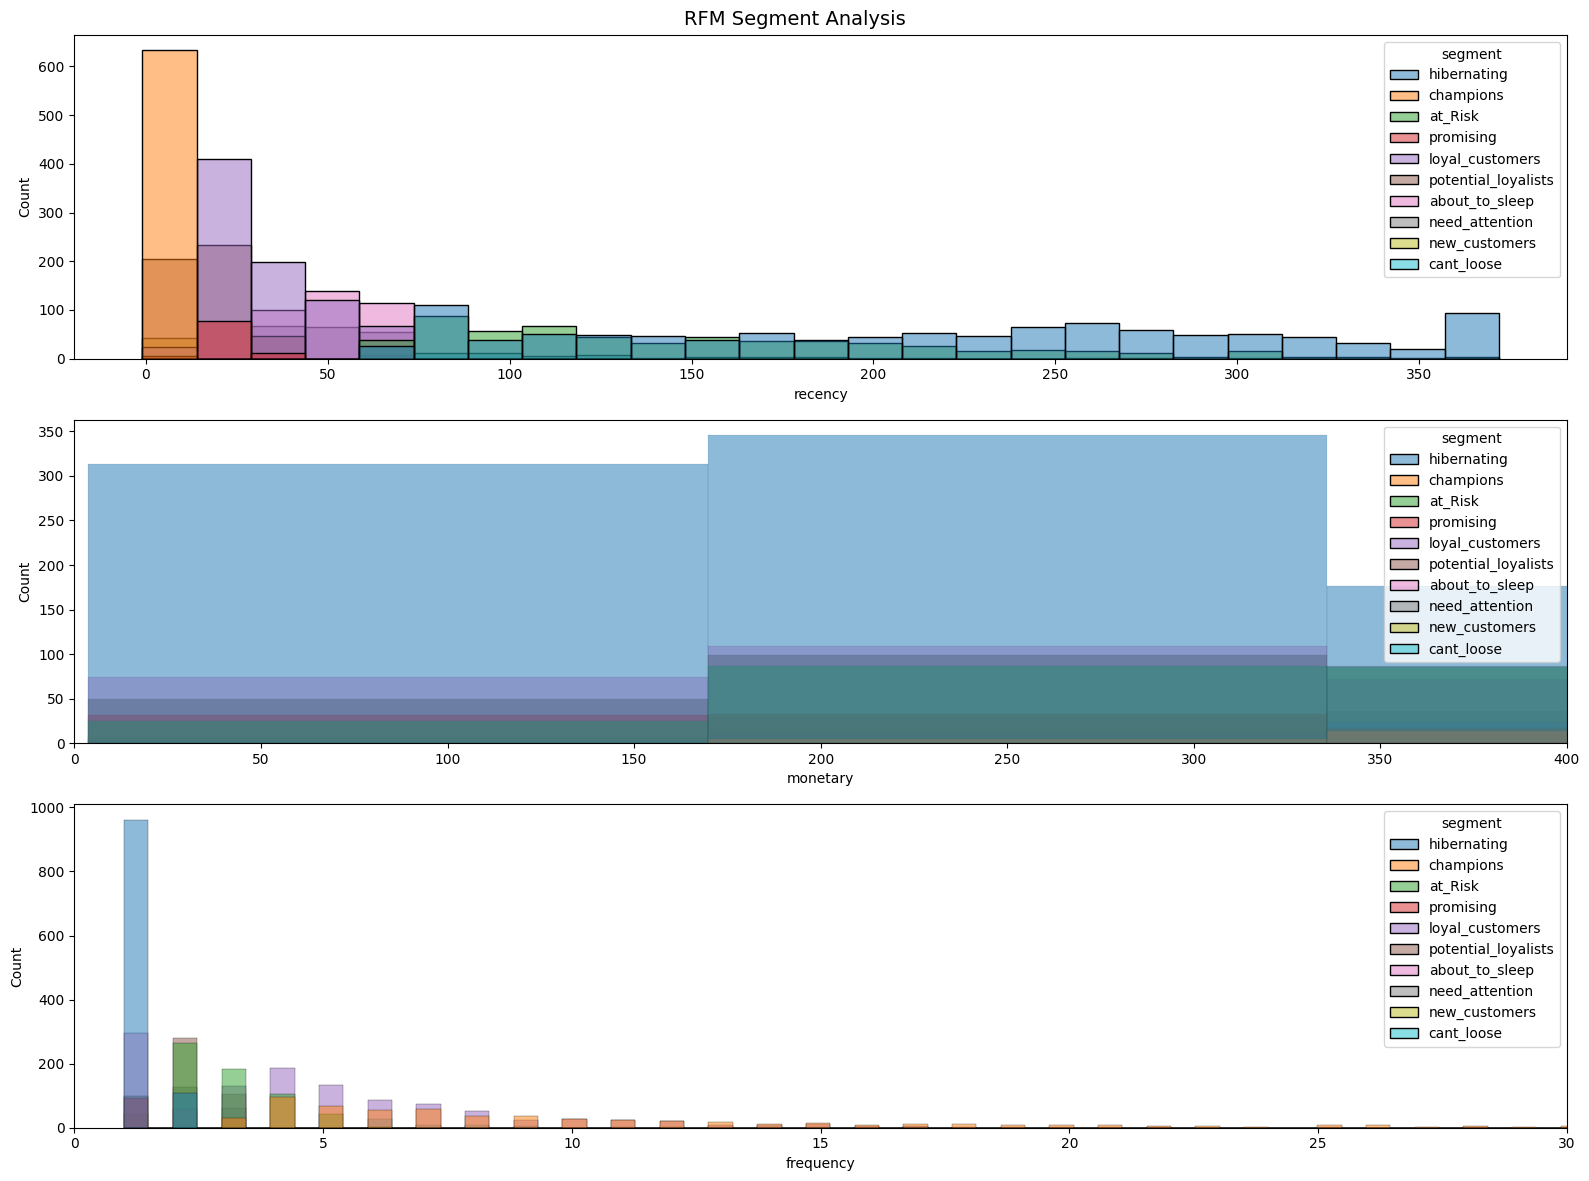

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx])
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()


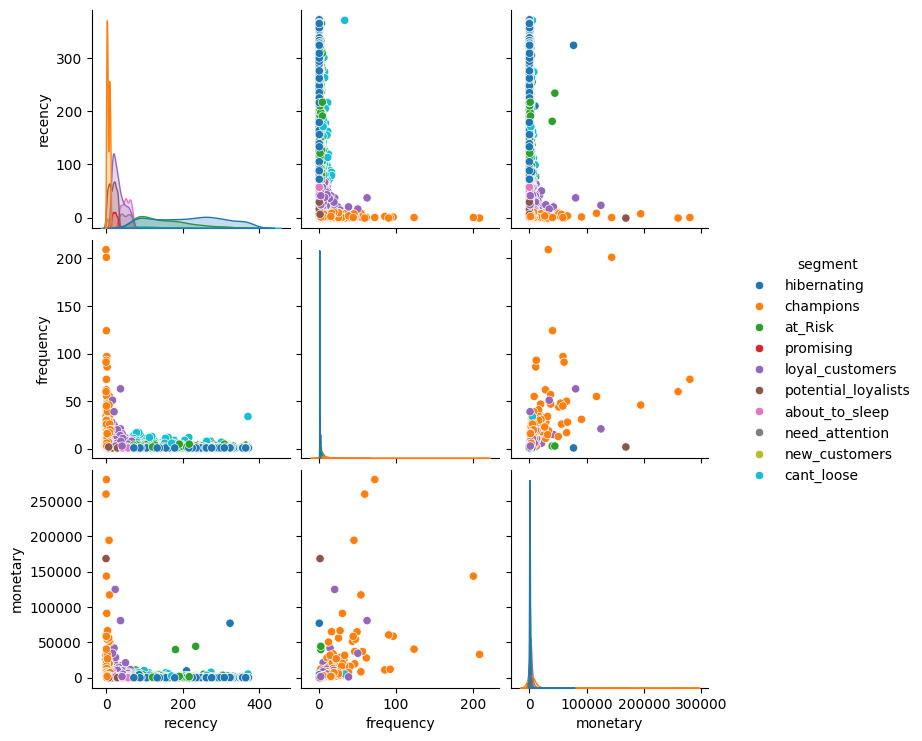

In [47]:
sns.pairplot(rfm, hue='segment')
plt.show()

### Recommendations
##### 1. Enhance Customer Engagement Strategies
##### Given the high frequency of purchases from certain customers, it is recommended to implement targeted marketing campaigns aimed at these individuals. This could involve personalized emails or loyalty rewards that encourage repeat purchases, particularly for customers who have shown a consistent buying pattern.

##### 2. Optimize Inventory Management
##### The analysis of product sales indicates certain items are significantly more popular than others. It would be prudent to adjust inventory levels accordingly, ensuring that high-demand products are always in stock while reducing the stock of less popular items. This can help minimize holding costs and improve cash flow.


##### 3. Focus on Geographic Trends
##### The data shows varying sales performance across different countries. Tailoring marketing strategies to specific regions based on their purchasing behavior can enhance sales effectiveness. For instance, if a particular product is popular in the UK but not in France, localized advertising and promotions could boost visibility and sales in those areas.


##### 4. Review Pricing Strategy
##### The analysis reveals some products have very high unit prices but lower sales volumes. Conducting a detailed pricing analysis could help identify whether these prices are deterring customers. Adjusting prices or offering promotional discounts on these items may increase their attractiveness and drive higher sales volumes.


##### 5. Implement Customer Feedback Mechanisms
##### To further improve customer satisfaction and retention, it is essential to establish feedback channels where customers can share their experiences and suggestions. This could be done through surveys or follow-up emails after purchases. Understanding customer preferences will help refine product offerings and enhance overall service quality.